# Importing Dependenices

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import glob
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import gensim
import codecs
import re

In [2]:
book_file = sorted(glob.glob('data/*.txt'))
print(book_file)

['data/got1.txt', 'data/got2.txt', 'data/got3.txt', 'data/got4.txt', 'data/got5.txt']


In [3]:
len(book_file)

5

In [4]:
corpus_raw = ''
for book_filename in book_file:
    print("Reading '{0}'...".format(book_filename))
    with codecs.open(book_filename, "r", "utf-8") as book_file:
        corpus_raw += book_file.read()
    print("Corpus is now {0} characters long".format(len(corpus_raw)))
    print()

Reading 'data/got1.txt'...
Corpus is now 1770659 characters long

Reading 'data/got2.txt'...
Corpus is now 4071041 characters long

Reading 'data/got3.txt'...
Corpus is now 6391405 characters long

Reading 'data/got4.txt'...
Corpus is now 8107945 characters long

Reading 'data/got5.txt'...
Corpus is now 9719485 characters long



In [5]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [6]:
raw_sentences = tokenizer.tokenize(corpus_raw)

In [7]:
def sentence_to_wordlist(raw):
    clean = re.sub("[^a-zA-Z]"," ", raw)
    words = clean.split()
    return words

In [8]:
sentences = []
for raw_sentence in raw_sentences:
    if len(raw_sentence) > 0:
        sentences.append(sentence_to_wordlist(raw_sentence))

In [9]:
len(sentences)

128868

In [10]:
print(raw_sentences[50])
print(sentences[50])

Two years past, he had fallen and shattered a hip, and it had never mended properly.
['Two', 'years', 'past', 'he', 'had', 'fallen', 'and', 'shattered', 'a', 'hip', 'and', 'it', 'had', 'never', 'mended', 'properly']


In [11]:
#training
model = gensim.models.Word2Vec(sentences=sentences)

In [12]:
words=list(model.wv.vocab)

In [13]:
words[50]

'means'

In [14]:
filename = 'got.txt'
model.wv.save_word2vec_format(filename, binary=False)

In [15]:
model.wv.most_similar('horrible')

[('vaguely', 0.9092236161231995),
 ('prompted', 0.9008951783180237),
 ('dully', 0.9002097249031067),
 ('hushed', 0.8978723883628845),
 ('dohaeris', 0.8942003846168518),
 ('Abomination', 0.8939157128334045),
 ('Tym', 0.8938322067260742),
 ('Friends', 0.8935519456863403),
 ('astonished', 0.8925769329071045),
 ('Slow', 0.8917987942695618)]

In [16]:
#Let’s see the result of semantically reasonable word vectors (king - man + woman)
model.wv.most_similar(positive=['woman', 'fruit'], negative=['man'])

[('butter', 0.7988775372505188),
 ('peppers', 0.7974092960357666),
 ('needles', 0.7933953404426575),
 ('glistening', 0.7918516397476196),
 ('dried', 0.7902840971946716),
 ('mutton', 0.7900048494338989),
 ('cream', 0.7883440256118774),
 ('onions', 0.782657265663147),
 ('mold', 0.779461145401001),
 ('carrots', 0.7776857018470764)]

In [17]:
print(model.wv.doesnt_match("far across the horizon i see ice cream".split()))

see


In [18]:
model.wv.similar_by_word("boy")

[('girl', 0.8731438517570496),
 ('maester', 0.8104037046432495),
 ('woman', 0.7925262451171875),
 ('dwarf', 0.7847913503646851),
 ('bird', 0.7818683385848999),
 ('child', 0.7791547179222107),
 ('fool', 0.7696139812469482),
 ('lad', 0.7693732976913452),
 ('singer', 0.7680333852767944),
 ('knight', 0.7514897584915161)]

In [19]:
model.vector_size

100

In [20]:
matrix = model.wv.syn0

/Users/nielspace/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """Entry point for launching an IPython kernel.


In [21]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

In [22]:
word_vector_matrix = tsne.fit_transform(matrix)

In [ ]:
points = pd.DataFrame(
    [
        (words, coords[0], coords[1])
        for word, coords in [
            (words, word_vector_matrix)
            for word in model.vocabulary
        ]
    ],
    columns=["word", "x", "y"]
)

In [ ]:
word_vector_matrix[1]

In [ ]:
len(words)

In [ ]:
for i in [word_vector_matrix]:
    print(i)

In [23]:
cord = pd.DataFrame([(i,j) for i,j in (word_vector_matrix)], columns=["x","y"])

In [24]:
cord.head()

,x,y
0,-40.458736,-1.015638
1,-38.731384,16.056826
2,-34.372620,-33.358524
3,-52.966103,16.123369
4,-33.246773,-2.512967


In [25]:
word_df = pd.DataFrame(words, columns=['words'])

In [26]:
word_df.head()

,words
0,This
1,edition
2,the
3,complete
4,of


In [27]:
print(cord.shape)
print(word_df.shape)

(13321, 2)
(13321, 1)


In [28]:
cord.head()

,x,y
0,-40.458736,-1.015638
1,-38.731384,16.056826
2,-34.372620,-33.358524
3,-52.966103,16.123369
4,-33.246773,-2.512967


In [29]:
new_data = word_df.join(cord)

In [30]:
import seaborn as sb
import matplotlib.pyplot as plt

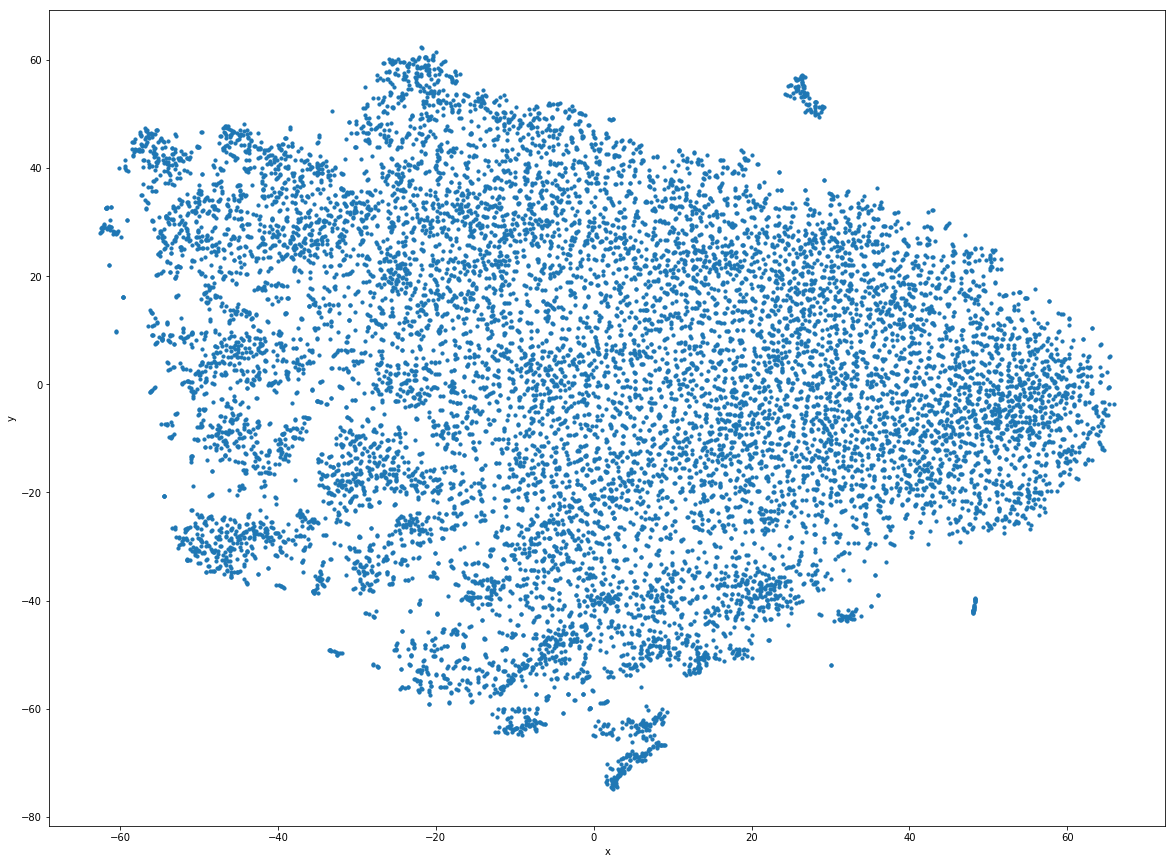

In [31]:
new_data.plot.scatter('x','y', s = 10, figsize = (20,15))